In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
datadir = "/content/drive/My Drive/"

Mounted at /content/drive


In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/user1.features_labels.csv")
d2 = pd.read_csv("/content/drive/MyDrive/user2.features_labels.csv")
data = pd.concat([d1, d2], axis = 0)

In [ ]:
data.shape

(11530, 278)

# Data Cleaning

In [ ]:
sel_col = [col for col in data.columns if "watch" in col.lower()]
new_data = data[sel_col]

In [ ]:
watch_data = new_data[["watch_acceleration:3d:mean_x", "watch_acceleration:3d:mean_y", "watch_acceleration:3d:mean_z",
         "watch_acceleration:3d:std_x", "watch_acceleration:3d:std_y", "watch_acceleration:3d:std_z",
         "watch_acceleration:3d:ro_xy", "watch_acceleration:3d:ro_xz", "watch_acceleration:3d:ro_yz"]]

In [ ]:
sel_col1 = [col for col in data.columns if "label" in col.lower()]
new_data1 = data[sel_col1]

In [ ]:
label_data = new_data1[["label:OR_standing", "label:LYING_DOWN", "label:SITTING",
                        "label:FIX_walking", "label:FIX_running", "label:OR_exercise"]]

In [ ]:
final_data = pd.concat([watch_data, label_data], axis=1)

In [ ]:
cleaned_data = final_data.dropna()

In [ ]:
cleaned_data['stationary'] = cleaned_data.apply(
    lambda row: 1 if (row["label:OR_standing"] == 1 or row["label:LYING_DOWN"] == 1 or row["label:SITTING"] == 1) else 0,
    axis=1
)

<ipython-input-11-151e9c3e470a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['stationary'] = cleaned_data.apply(


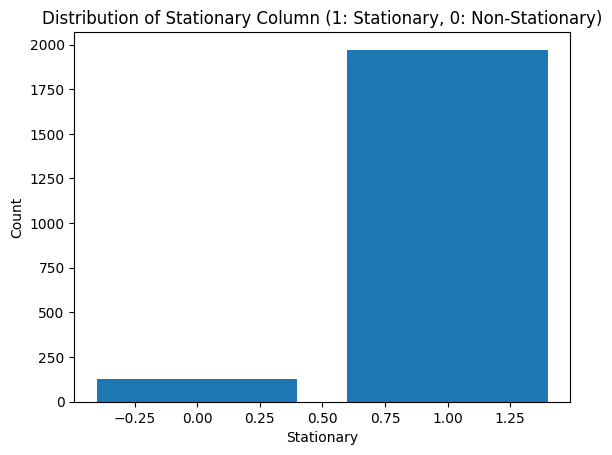

In [ ]:
import matplotlib.pyplot as plt


stationary_counts = cleaned_data['stationary'].value_counts()

plt.bar(stationary_counts.index, stationary_counts.values)

plt.xlabel('Stationary')
plt.ylabel('Count')
plt.title('Distribution of Stationary Column (1: Stationary, 0: Non-Stationary)')

plt.show()


In [ ]:
cleaned_data = cleaned_data.drop(["label:OR_standing", "label:LYING_DOWN", "label:SITTING",
                                  "label:FIX_walking", "label:FIX_running", "label:OR_exercise"], axis = 1)

In [ ]:
X = cleaned_data.drop("stationary", axis = 1)
y = cleaned_data["stationary"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 121)

In [ ]:
#Logistic Regression

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
lr_acc

0.9555555555555556

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, lr_preds)
print(confusion_matrix)
print(classification_report(y_test, lr_preds))

[[ 14  24]
 [  4 588]]
              precision    recall  f1-score   support

           0       0.78      0.37      0.50        38
           1       0.96      0.99      0.98       592

    accuracy                           0.96       630
   macro avg       0.87      0.68      0.74       630
weighted avg       0.95      0.96      0.95       630



In [ ]:
# Decision Tree

# Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [16, 24, 32],
    'random_state': [121]
}

dt_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_dt_clf = grid_search.best_estimator_

dt_preds = best_dt_clf.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
print("Accuracy on Test Set:", dt_acc)


Best Parameters: {'max_depth': 6, 'min_samples_split': 32, 'random_state': 121}
Accuracy on Test Set: 0.953968253968254


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_preds)
print(confusion_matrix)
print(classification_report(y_test, dt_preds))

[[ 21  17]
 [ 12 580]]
              precision    recall  f1-score   support

           0       0.64      0.55      0.59        38
           1       0.97      0.98      0.98       592

    accuracy                           0.95       630
   macro avg       0.80      0.77      0.78       630
weighted avg       0.95      0.95      0.95       630



In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [121]
}

rf_clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_clf = grid_search.best_estimator_

rf_preds = best_rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Accuracy on Test Set:", rf_acc)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 121}
Accuracy on Test Set: 0.9666666666666667


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
print(confusion_matrix)
print(classification_report(y_test, rf_preds))

[[ 21  17]
 [  4 588]]
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.97      0.99      0.98       592

    accuracy                           0.97       630
   macro avg       0.91      0.77      0.82       630
weighted avg       0.96      0.97      0.96       630



In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel = "rbf", C = 10)
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
svm_acc

0.9666666666666667

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, svm_preds)
print(confusion_matrix)
print(classification_report(y_test, svm_preds))

[[ 21  17]
 [  4 588]]
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.97      0.99      0.98       592

    accuracy                           0.97       630
   macro avg       0.91      0.77      0.82       630
weighted avg       0.96      0.97      0.96       630



In [ ]:
# xgb
import xgboost as xgb
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 2],
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_xgb_clf = grid_search.best_estimator_

best_xgb_preds = best_xgb_clf.predict(X_test)

best_xgb_acc = accuracy_score(y_test, best_xgb_preds)
print("Accuracy on Test Set:", best_xgb_acc)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy on Test Set: 0.9603174603174603


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, best_xgb_preds)
print(confusion_matrix)
print(classification_report(y_test, best_xgb_preds))

[[ 21  17]
 [  8 584]]
              precision    recall  f1-score   support

           0       0.72      0.55      0.63        38
           1       0.97      0.99      0.98       592

    accuracy                           0.96       630
   macro avg       0.85      0.77      0.80       630
weighted avg       0.96      0.96      0.96       630



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(GlobalMaxPooling1D())

cnn_model.add(Dense(units=50, activation='relu'))
cnn_model.add(Dense(units=1, activation='sigmoid'))


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train, y_train.astype('float32'), epochs=10, batch_size=32, validation_split=0.2)

cnn_preds = cnn_model.predict(X_test)
cnn_preds = (cnn_preds > 0.5).astype(int)

cnn_acc = accuracy_score(y_test, cnn_preds)
print("Accuracy on Test Set:", cnn_acc)


Epoch 1/10
37/37 [==============================] - 2s 14ms/step - loss: 24.2224 - accuracy: 0.7300 - val_loss: 6.2209 - val_accuracy: 0.9252
Epoch 2/10
37/37 [==============================] - 0s 5ms/step - loss: 2.9790 - accuracy: 0.9276 - val_loss: 1.5872 - val_accuracy: 0.9048
Epoch 3/10
37/37 [==============================] - 0s 6ms/step - loss: 1.3335 - accuracy: 0.9259 - val_loss: 1.1198 - val_accuracy: 0.9184
Epoch 4/10
37/37 [==============================] - 0s 5ms/step - loss: 0.9963 - accuracy: 0.9233 - val_loss: 0.9847 - val_accuracy: 0.9218
Epoch 5/10
37/37 [==============================] - 0s 5ms/step - loss: 0.8254 - accuracy: 0.9216 - val_loss: 0.7542 - val_accuracy: 0.9286
Epoch 6/10
37/37 [==============================] - 0s 5ms/step - loss: 0.6110 - accuracy: 0.9233 - val_loss: 0.7421 - val_accuracy: 0.9116
Epoch 7/10
37/37 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.9157 - val_loss: 0.6966 - val_accuracy: 0.8912
Epoch 8/10
37/37 [

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, cnn_preds)
print(confusion_matrix)
print(classification_report(y_test, cnn_preds))

[[  3  35]
 [  6 586]]
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        38
           1       0.94      0.99      0.97       592

    accuracy                           0.93       630
   macro avg       0.64      0.53      0.55       630
weighted avg       0.91      0.93      0.92       630



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rnn_model = Sequential()

rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))

rnn_model.add(Dense(units=50, activation='relu'))
rnn_model.add(Dense(units=1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

rnn_model.fit(X_train, y_train.astype('float32'), epochs=10, batch_size=32, validation_split=0.2)

rnn_preds = rnn_model.predict(X_test)
rnn_preds = (rnn_preds > 0.5).astype(int)


rnn_acc = accuracy_score(y_test, rnn_preds)
print("Accuracy on Test Set:", rnn_acc)


Epoch 1/10
37/37 [==============================] - 2s 13ms/step - loss: 0.3984 - accuracy: 0.9157 - val_loss: 0.1826 - val_accuracy: 0.9286
Epoch 2/10
37/37 [==============================] - 0s 5ms/step - loss: 0.1754 - accuracy: 0.9395 - val_loss: 0.1692 - val_accuracy: 0.9354
Epoch 3/10
37/37 [==============================] - 0s 5ms/step - loss: 0.1368 - accuracy: 0.9540 - val_loss: 0.1979 - val_accuracy: 0.9116
Epoch 4/10
37/37 [==============================] - 0s 5ms/step - loss: 0.1495 - accuracy: 0.9446 - val_loss: 0.1791 - val_accuracy: 0.9354
Epoch 5/10
37/37 [==============================] - 0s 7ms/step - loss: 0.1236 - accuracy: 0.9574 - val_loss: 0.1597 - val_accuracy: 0.9456
Epoch 6/10
37/37 [==============================] - 0s 6ms/step - loss: 0.1381 - accuracy: 0.9429 - val_loss: 0.1632 - val_accuracy: 0.9422
Epoch 7/10
37/37 [==============================] - 0s 5ms/step - loss: 0.1158 - accuracy: 0.9557 - val_loss: 0.1493 - val_accuracy: 0.9456
Epoch 8/10
37/37 [=

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rnn_preds)
print(confusion_matrix)
print(classification_report(y_test, rnn_preds))

[[ 11  27]
 [  6 586]]
              precision    recall  f1-score   support

           0       0.65      0.29      0.40        38
           1       0.96      0.99      0.97       592

    accuracy                           0.95       630
   macro avg       0.80      0.64      0.69       630
weighted avg       0.94      0.95      0.94       630



In [ ]:
# LSTM

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

lstm_model = Sequential()

lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))

lstm_model.add(Dense(units=50, activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train, y_train.astype('float32'), epochs=10, batch_size=32, validation_split=0.2)

lstm_preds = lstm_model.predict(X_test)
lstm_preds = (lstm_preds > 0.5).astype(int)

lstm_acc = accuracy_score(y_test, lstm_preds)
print("Accuracy on Test Set:", lstm_acc)


Epoch 1/10
37/37 [==============================] - 2s 15ms/step - loss: 1.3869 - accuracy: 0.8612 - val_loss: 0.3962 - val_accuracy: 0.9014
Epoch 2/10
37/37 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.9293 - val_loss: 0.3113 - val_accuracy: 0.8776
Epoch 3/10
37/37 [==============================] - 0s 8ms/step - loss: 0.3305 - accuracy: 0.9310 - val_loss: 0.3422 - val_accuracy: 0.9218
Epoch 4/10
37/37 [==============================] - 0s 9ms/step - loss: 0.2600 - accuracy: 0.9302 - val_loss: 0.3420 - val_accuracy: 0.9286
Epoch 5/10
37/37 [==============================] - 0s 9ms/step - loss: 0.2463 - accuracy: 0.9344 - val_loss: 0.3166 - val_accuracy: 0.9286
Epoch 6/10
37/37 [==============================] - 0s 7ms/step - loss: 0.2472 - accuracy: 0.9310 - val_loss: 0.3005 - val_accuracy: 0.9218
Epoch 7/10
37/37 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.9319 - val_loss: 0.2240 - val_accuracy: 0.9150
Epoch 8/10
37/37 [=

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, lstm_preds)
print(confusion_matrix)
print(classification_report(y_test, lstm_preds))

[[  5  33]
 [ 10 582]]
              precision    recall  f1-score   support

           0       0.33      0.13      0.19        38
           1       0.95      0.98      0.96       592

    accuracy                           0.93       630
   macro avg       0.64      0.56      0.58       630
weighted avg       0.91      0.93      0.92       630



In [ ]:
new_data1.columns

Index(['label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking',
       'label:FIX_running', 'label:BICYCLING', 'label:SLEEPING',
       'label:LAB_WORK', 'label:IN_CLASS', 'label:IN_A_MEETING',
       'label:LOC_main_workplace', 'label:OR_indoors', 'label:OR_outside',
       'label:IN_A_CAR', 'label:ON_A_BUS', 'label:DRIVE_-_I_M_THE_DRIVER',
       'label:DRIVE_-_I_M_A_PASSENGER', 'label:LOC_home',
       'label:FIX_restaurant', 'label:PHONE_IN_POCKET', 'label:OR_exercise',
       'label:COOKING', 'label:SHOPPING', 'label:STROLLING',
       'label:DRINKING__ALCOHOL_', 'label:BATHING_-_SHOWER', 'label:CLEANING',
       'label:DOING_LAUNDRY', 'label:WASHING_DISHES', 'label:WATCHING_TV',
       'label:SURFING_THE_INTERNET', 'label:AT_A_PARTY', 'label:AT_A_BAR',
       'label:LOC_beach', 'label:SINGING', 'label:TALKING',
       'label:COMPUTER_WORK', 'label:EATING', 'label:TOILET', 'label:GROOMING',
       'label:DRESSING', 'label:AT_THE_GYM', 'label:STAIRS_-_GOING_UP',
       'label:STAI

In [ ]:
label_data = new_data1[["label:COOKING", "label:DRIVE_-_I_M_THE_DRIVER", "label:BICYCLING", "label:COMPUTER_WORK",
                        "label:EATING", "label:WASHING_DISHES", "label:BATHING_-_SHOWER"]]
final_data = pd.concat([watch_data, label_data], axis=1)
final_data = final_data.fillna(0)

In [ ]:
final_data['label'] = final_data.apply(
    lambda row: 0 if row["label:COOKING"] == 1 else
                1 if row["label:DRIVE_-_I_M_THE_DRIVER"] == 1 else
                2 if row["label:BICYCLING"] == 1 else
                3 if row["label:COMPUTER_WORK"] == 1 else
                4 if row["label:EATING"] == 1 else
                5 if row["label:WASHING_DISHES"] == 1 else
                6 if row["label:BATHING_-_SHOWER"] == 1 else 7,
    axis=1
)


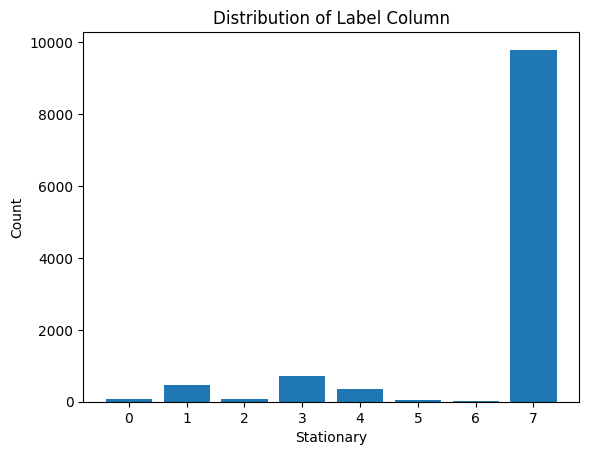

In [ ]:
stationary_counts = final_data['label'].value_counts()

plt.bar(stationary_counts.index, stationary_counts.values)

plt.xlabel('Stationary')
plt.ylabel('Count')
plt.title('Distribution of Label Column')

plt.show()

In [ ]:
final_data = final_data.drop(["label:COOKING", "label:DRIVE_-_I_M_THE_DRIVER", "label:BICYCLING", "label:COMPUTER_WORK",
                        "label:EATING", "label:WASHING_DISHES", "label:BATHING_-_SHOWER"], axis = 1)

In [ ]:
final_data = final_data[final_data['label'] != 7]

In [ ]:
X = final_data.drop("label", axis = 1)
y = final_data["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 121)

In [ ]:
# Decision Tree
param_grid = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [16, 24, 32],
    'random_state': [121]
}

dt_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_dt_clf = grid_search.best_estimator_

dt_preds = best_dt_clf.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
print("Accuracy on Test Set:", dt_acc)

Best Parameters: {'max_depth': 12, 'min_samples_split': 32, 'random_state': 121}
Accuracy on Test Set: 0.6091954022988506


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [121]
}

rf_clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_clf = grid_search.best_estimator_

rf_preds = best_rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Accuracy on Test Set:", rf_acc)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 121}
Accuracy on Test Set: 0.6800766283524904


In [ ]:
#SVM
svm_clf = svm.SVC(kernel = "rbf", C = 10)
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
svm_acc


0.6379310344827587

In [ ]:
# xgb
import xgboost as xgb
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 2],
}

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_xgb_clf = grid_search.best_estimator_

best_xgb_preds = best_xgb_clf.predict(X_test)

best_xgb_acc = accuracy_score(y_test, best_xgb_preds)
print("Accuracy on Test Set:", best_xgb_acc)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy on Test Set: 0.6704980842911877


In [ ]:
# CNN
num_classes = len(set(y_train))

cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(GlobalMaxPooling1D())

cnn_model.add(Dense(units=50, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

cnn_preds_probs = cnn_model.predict(X_test)
cnn_preds = np.argmax(cnn_preds_probs, axis=1)

cnn_acc = accuracy_score(y_test, cnn_preds)
print("Accuracy on Test Set:", cnn_acc)



Epoch 1/10
31/31 [==============================] - 1s 10ms/step - loss: 17.8875 - accuracy: 0.3961 - val_loss: 11.5374 - val_accuracy: 0.4938
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 9.2851 - accuracy: 0.4774 - val_loss: 7.8467 - val_accuracy: 0.4650
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 6.3060 - accuracy: 0.4938 - val_loss: 5.5138 - val_accuracy: 0.5473
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 4.9805 - accuracy: 0.5021 - val_loss: 4.9485 - val_accuracy: 0.5473
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 4.2266 - accuracy: 0.4990 - val_loss: 3.6444 - val_accuracy: 0.5679
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 3.5405 - accuracy: 0.5051 - val_loss: 3.3721 - val_accuracy: 0.5556
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 3.3234 - accuracy: 0.5298 - val_loss: 2.7817 - val_accuracy: 0.5802
Epoch 8/10
31/31 

In [ ]:
# RNN
num_classes = len(set(y_train))

rnn_model = Sequential()

rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))

rnn_model.add(Dense(units=50, activation='relu'))
rnn_model.add(Dense(units=num_classes, activation='softmax'))

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

rnn_preds_probs = rnn_model.predict(X_test)
rnn_preds = tf.argmax(rnn_preds_probs, axis=1)

rnn_acc = accuracy_score(y_test, rnn_preds)
print("Accuracy on Test Set:", rnn_acc)

Epoch 1/10
31/31 [==============================] - 2s 15ms/step - loss: 5.5806 - accuracy: 0.3282 - val_loss: 2.0000 - val_accuracy: 0.4897
Epoch 2/10
31/31 [==============================] - 0s 6ms/step - loss: 1.7467 - accuracy: 0.4733 - val_loss: 1.6629 - val_accuracy: 0.4979
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - loss: 1.4747 - accuracy: 0.5062 - val_loss: 1.5132 - val_accuracy: 0.5391
Epoch 4/10
31/31 [==============================] - 0s 5ms/step - loss: 1.3594 - accuracy: 0.5381 - val_loss: 1.5864 - val_accuracy: 0.5679
Epoch 5/10
31/31 [==============================] - 0s 6ms/step - loss: 1.2950 - accuracy: 0.5442 - val_loss: 1.4077 - val_accuracy: 0.5761
Epoch 6/10
31/31 [==============================] - 0s 6ms/step - loss: 1.2094 - accuracy: 0.5761 - val_loss: 1.3519 - val_accuracy: 0.5802
Epoch 7/10
31/31 [==============================] - 0s 5ms/step - loss: 1.1580 - accuracy: 0.5864 - val_loss: 1.3413 - val_accuracy: 0.5761
Epoch 8/10
31/31 [=

In [ ]:
#LSTM
num_classes = len(set(y_train))

lstm_model = Sequential()

lstm_model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], 1)))

lstm_model.add(Dense(units=50, activation='relu'))
lstm_model.add(Dense(units=num_classes, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

lstm_preds_probs = lstm_model.predict(X_test)
lstm_preds = tf.argmax(lstm_preds_probs, axis=1)

lstm_acc = accuracy_score(y_test, lstm_preds)
print("Accuracy on Test Set:", lstm_acc)

Epoch 1/10
31/31 [==============================] - 3s 30ms/step - loss: 4.0451 - accuracy: 0.3282 - val_loss: 1.8776 - val_accuracy: 0.3992
Epoch 2/10
31/31 [==============================] - 1s 17ms/step - loss: 1.6554 - accuracy: 0.4424 - val_loss: 1.5495 - val_accuracy: 0.4897
Epoch 3/10
31/31 [==============================] - 0s 15ms/step - loss: 1.2932 - accuracy: 0.5473 - val_loss: 1.4183 - val_accuracy: 0.5350
Epoch 4/10
31/31 [==============================] - 1s 17ms/step - loss: 1.1980 - accuracy: 0.5720 - val_loss: 1.2982 - val_accuracy: 0.5638
Epoch 5/10
31/31 [==============================] - 1s 17ms/step - loss: 1.0839 - accuracy: 0.6214 - val_loss: 1.2517 - val_accuracy: 0.5802
Epoch 6/10
31/31 [==============================] - 0s 11ms/step - loss: 1.0545 - accuracy: 0.6193 - val_loss: 1.2580 - val_accuracy: 0.5432
Epoch 7/10
31/31 [==============================] - 0s 12ms/step - loss: 0.9966 - accuracy: 0.6296 - val_loss: 1.1824 - val_accuracy: 0.5802
Epoch 8/10
31